[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/ML_05_Clustering.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [2]:
# Define number of samples
n_samples = 1500

# Create a synthetic dataset

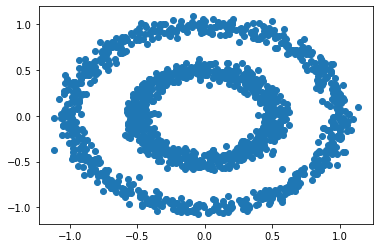

In [3]:
# Create first dataset
DB1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]

plt.scatter(DB1[:, 0], DB1[:, 1])
plt.show()

k-mean cluster labels: [0 1 2]


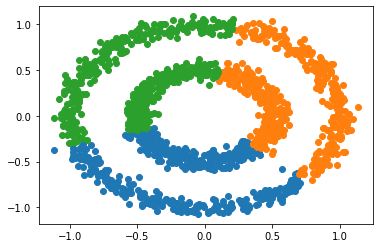

In [4]:
# Train k-means and show assigned labels
kmeans = KMeans(n_clusters=3).fit(DB1)
print(f"k-mean cluster labels: {np.unique(kmeans.labels_)}")

plt.scatter(DB1[kmeans.labels_==0, 0], DB1[kmeans.labels_==0, 1])
plt.scatter(DB1[kmeans.labels_==1, 0], DB1[kmeans.labels_==1, 1])
plt.scatter(DB1[kmeans.labels_==2, 0], DB1[kmeans.labels_==2, 1])
plt.show()

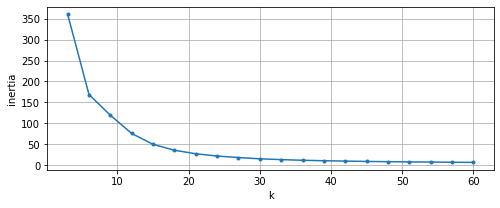

In [5]:
# Try different values for k and create elbow curve
inertia = []
k_s = np.arange(3, 61, 3)
for k in k_s:
  kmeans = KMeans(n_clusters=k).fit(DB1)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_s, inertia, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

k-mean cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


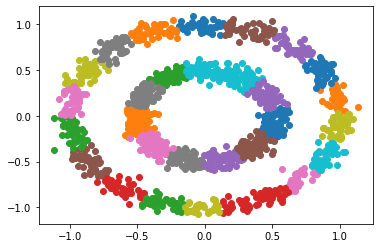

In [6]:
# 30 seens like a good inflection point. Let's try it out
kmeans = KMeans(n_clusters=30).fit(DB1)
print(f"k-mean cluster labels: {np.unique(kmeans.labels_)}")

for c in np.unique(kmeans.labels_):
  plt.scatter(DB1[kmeans.labels_==c, 0], DB1[kmeans.labels_==c, 1])
plt.show()

Agglomerative cluster labels: [0 1 2]


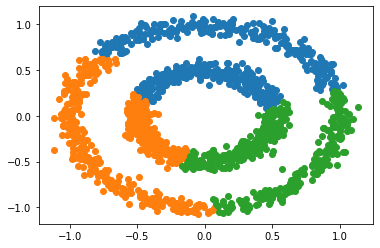

In [7]:
# Let's try agglomerative
agglom = AgglomerativeClustering(n_clusters=3).fit(DB1)
print(f"Agglomerative cluster labels: {np.unique(agglom.labels_)}")

for c in np.unique(agglom.labels_):
  plt.scatter(DB1[agglom.labels_==c, 0], DB1[agglom.labels_==c, 1])
plt.show()

DBSCAN cluster labels: [-1  0  1  2]


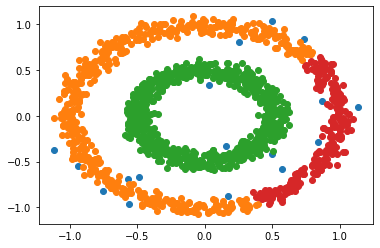

In [8]:
# Let's try DBSCAN
dbscan = DBSCAN(eps=0.07).fit(DB1)
print(f"DBSCAN cluster labels: {np.unique(dbscan.labels_)}")

for c in np.unique(dbscan.labels_):
  plt.scatter(DB1[dbscan.labels_==c, 0], DB1[dbscan.labels_==c, 1])
plt.show()

# Can you find a good clustering for each of the followind datasets?

In [9]:
# Create a few more synthetic datasets
DB2 = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
DB3 = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
DB4 = np.random.rand(n_samples, 2)
DB5 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)[0]